## imports

In [289]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

## dataset

In [290]:
data_amba = []

with open("CSV/AMBA.csv", "r") as file:
    for line in file.readlines():
        row = line.replace("\n", "").split(",")
        data_amba.append(row)

df_amba = pd.DataFrame(data_amba)
df_amba.columns = df_amba.iloc[0]
df_amba = df_amba[1:]
df_amba = df_amba.set_index("Date")
#df_amba

In [291]:
df_amba["Adj Close"] = df_amba["Adj Close"].astype(float)
#type(df_amba["Adj Close"][1])
#df_amba["Adj Close"][0] 

In [292]:
weekly_return_amba = []

for i in range(1, len(df_amba["Adj Close"])):
    #print(df_amba["Adj Close"][i])
    weekly_return_amba.append((df_amba["Adj Close"][i] - df_amba["Adj Close"][i-1]) / df_amba["Adj Close"][i-1])
    
#weekly_return_amba

In [293]:
data_goog = []

with open("CSV/GOOG.csv", "r") as file:
    for line in file.readlines():
        row = line.replace("\n", "").split(",")
        data_goog.append(row)

df_goog = pd.DataFrame(data_goog)
df_goog.columns = df_goog.iloc[0]
df_goog = df_goog[1:]
df_goog = df_goog.set_index("Date")
#df_goog

In [294]:
df_goog["Adj Close"] = df_goog["Adj Close"].astype(float)
weekly_return_goog = []

for i in range(1, len(df_goog["Adj Close"])):
    #print(df_goog["Adj Close"][i])
    weekly_return_goog.append((df_goog["Adj Close"][i] - df_goog["Adj Close"][i-1]) / df_goog["Adj Close"][i-1])
    
#weekly_return_goog

In [295]:
data_nflx = []

with open("CSV/NFLX.csv", "r") as file:
    for line in file.readlines():
        row = line.replace("\n", "").split(",")
        data_nflx.append(row)

df_nflx = pd.DataFrame(data_nflx)
df_nflx.columns = df_nflx.iloc[0]
df_nflx = df_nflx[1:]
df_nflx = df_nflx.set_index("Date")
#df_nflx

In [296]:
df_nflx["Adj Close"] = df_nflx["Adj Close"].astype(float)
weekly_return_nflx = []

for i in range(1, len(df_nflx["Adj Close"])):
    #print(df_nflx["Adj Close"][i])
    weekly_return_nflx.append((df_nflx["Adj Close"][i] - df_nflx["Adj Close"][i-1]) / df_nflx["Adj Close"][i-1])
    
#weekly_return_nflx

In [297]:
data_orcl = []

with open("CSV/ORCL.csv", "r") as file:
    for line in file.readlines():
        row = line.replace("\n", "").split(",")
        data_orcl.append(row)

df_orcl = pd.DataFrame(data_orcl)
df_orcl.columns = df_orcl.iloc[0]
df_orcl = df_orcl[1:]
df_orcl = df_orcl.set_index("Date")
#df_orcl

In [298]:
df_orcl["Adj Close"] = df_orcl["Adj Close"].astype(float)
weekly_return_orcl = []

for i in range(1, len(df_orcl["Adj Close"])):
    #print(df_orcl["Adj Close"][i])
    weekly_return_orcl.append((df_orcl["Adj Close"][i] - df_orcl["Adj Close"][i-1]) / df_orcl["Adj Close"][i-1])
    
#weekly_return_orcl

In [299]:
data_tsla = []

with open("CSV/TSLA.csv", "r") as file:
    for line in file.readlines():
        row = line.replace("\n", "").split(",")
        data_tsla.append(row)

df_tsla = pd.DataFrame(data_tsla)
df_tsla.columns = df_tsla.iloc[0]
df_tsla = df_tsla[1:]
df_tsla = df_tsla.set_index("Date")
#df_tsla

In [300]:
df_tsla["Adj Close"] = df_tsla["Adj Close"].astype(float)
weekly_return_tsla = []

for i in range(1, len(df_tsla["Adj Close"])):
    #print(df_tsla["Adj Close"][i])
    weekly_return_tsla.append((df_tsla["Adj Close"][i] - df_tsla["Adj Close"][i-1]) / df_tsla["Adj Close"][i-1])
    
#weekly_return_tsla

In [301]:
len(weekly_return_amba)
len(weekly_return_goog)
len(weekly_return_nflx)
len(weekly_return_orcl)
len(weekly_return_tsla)

195

In [302]:
df_stocks = pd.DataFrame({'AMBA': weekly_return_amba, 'GOOG': weekly_return_goog, 'NFLX': weekly_return_nflx, 'ORCL': weekly_return_orcl, 'TSLA': weekly_return_tsla}, index=df_amba.index[1:])
df_stocks

AMBA      GOOG      NFLX      ORCL      TSLA
Date                                                        
2015-01-08 -0.034167 -0.000459 -0.009046  0.000623 -0.086561
2015-01-15  0.020017  0.034280  0.262275  0.009986  0.020136
2015-01-22 -0.035696 -0.015520  0.081069 -0.018395  0.014244
2015-01-29 -0.008421  0.025020  0.014126 -0.006324  0.096203
2015-02-05 -0.029724  0.025270  0.013773  0.022159 -0.026310
...              ...       ...       ...       ...       ...
2018-08-30 -0.028949 -0.050284 -0.072981 -0.017386 -0.079571
2018-09-06  0.030583 -0.019941  0.084325  0.027061  0.034908
2018-09-13 -0.090274  0.007112 -0.008082  0.001824  0.029187
2018-09-20  0.042489  0.008027  0.029758  0.044507  0.035315
2018-09-27  0.017092  0.011987 -0.009924 -0.001356 -0.144745

[195 rows x 5 columns]

## return - varience - standard deviation

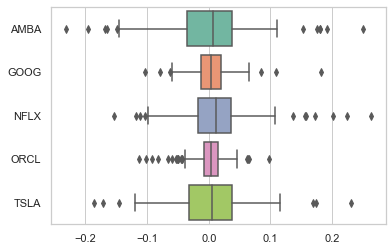

In [303]:
boxplot_returns = sns.boxplot(data=df_stocks, orient="h", palette="Set2")

In [305]:
avg_return_amba = df_stocks["AMBA"].mean()*100
avg_return_goog = df_stocks["GOOG"].mean()*100
avg_return_nflx = df_stocks["NFLX"].mean()*100
avg_return_orcl = df_stocks["ORCL"].mean()*100
avg_return_tsla = df_stocks["TSLA"].mean()*100

#print(avg_return_amba, avg_return_goog, avg_return_nflx, avg_return_orcl, avg_return_tsla)
percent_avg_returns = [avg_return_amba, avg_return_goog, avg_return_nflx, avg_return_orcl, avg_return_tsla]
percent_avg_returns

[0.00929550478372682,
 0.4956843239489363,
 1.2298688016235604,
 0.15848191477494344,
 0.2902174643758332]

In [306]:
var_amba = df_stocks["AMBA"].var()*100
var_goog = df_stocks["GOOG"].var()*100
var_nflx = df_stocks["NFLX"].var()*100
var_orcl = df_stocks["ORCL"].var()*100
var_tsla = df_stocks["TSLA"].var()*100

percent_variences = [var_amba, var_goog, var_nflx, var_orcl, var_tsla]
percent_variences

[0.4662437645270469,
 0.09759318059863849,
 0.32777939895442376,
 0.0748468866122799,
 0.3483465355095528]

In [307]:
stddev_amba = df_stocks["AMBA"].std()*100
stddev_goog = df_stocks["GOOG"].std()*100
stddev_nflx = df_stocks["NFLX"].std()*100
stddev_orcl = df_stocks["ORCL"].std()*100
stddev_tsla = df_stocks["TSLA"].std()*100

percent_standard_deviations = [stddev_amba, stddev_goog, stddev_nflx, stddev_orcl, stddev_tsla]
percent_standard_deviations

[6.828204482344146,
 3.1239907265969675,
 5.725202170704749,
 2.735815904118548,
 5.902088914185831]

In [308]:
df_specs = pd.DataFrame([percent_avg_returns, percent_variences, percent_standard_deviations])
#df_specs.shape
df_specs.rename(index={0: 'Mean Return %', 1: 'Variance %', 2: 'Standard Deviation %'}, inplace=True)
df_specs.rename(columns={0: 'AMBA', 1: 'GOOG', 2: 'NFLX', 3: 'ORCL', 4: 'TSLA'}, inplace=True)
df_specs

AMBA      GOOG      NFLX      ORCL      TSLA
Mean Return %         0.009296  0.495684  1.229869  0.158482  0.290217
Variance %            0.466244  0.097593  0.327779  0.074847  0.348347
Standard Deviation %  6.828204  3.123991  5.725202  2.735816  5.902089

In [309]:
cov_matrix = df_stocks.cov()
cov_matrix

AMBA      GOOG      NFLX      ORCL      TSLA
AMBA  0.004662  0.000724  0.001039  0.000369  0.000782
GOOG  0.000724  0.000976  0.000844  0.000303  0.000524
NFLX  0.001039  0.000844  0.003278  0.000361  0.001029
ORCL  0.000369  0.000303  0.000361  0.000748  0.000381
TSLA  0.000782  0.000524  0.001029  0.000381  0.003483

In [310]:
df_specs[:1]
#df_specs.iloc[0]

AMBA      GOOG      NFLX      ORCL      TSLA
Mean Return %  0.009296  0.495684  1.229869  0.158482  0.290217

## portfolio optimization

In [311]:
number_of_portfolios = 2000
portfolio_returns = []
portfolio_risk = []
sharpe_ratio_port = []
risk_free_rate = 0.0002

for port in range (number_of_portfolios):
    mean_returns = np.array(percent_avg_returns)
    weights = np.random.random_sample((len(mean_returns)))
    weights = weights / np.sum(weights)
    #print(type(weights))
    #print(weights)
    #return
    annualize_return = np.sum((np.array(df_specs[:1]) * weights.T) * 52)
    #annualize_return
    portfolio_returns.append(annualize_return)    
    #portfolio_returns
    #variance
    matrix_covariance_portfolio = (cov_matrix) * 52
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance_portfolio, weights))
    #portfolio_variance
    portfolio_standard_deviation= np.sqrt(portfolio_variance) 
    portfolio_risk.append(portfolio_standard_deviation)
    #portfolio_risk
    #sharpe_ratio
    sharpe_ratio = ((annualize_return - risk_free_rate) / portfolio_standard_deviation)
    sharpe_ratio_port.append(sharpe_ratio)
    #sharpe_ratio_port
    #keep weights as well to find out later the weights from the optimized portfolio
    portfolio_weights.append(weights)
    
#portfolio_weights


In [312]:
portfolio_risk = np.array(portfolio_risk)
portfolio_returns = np.array(portfolio_returns)
sharpe_ratio_port = np.array(sharpe_ratio_port)

#len(portfolio_risk)
#len(portfolio_returns)
#len(sharpe_ratio_port)

#portfolio_risk
#portfolio_returns
#shasharpe_ratio_port

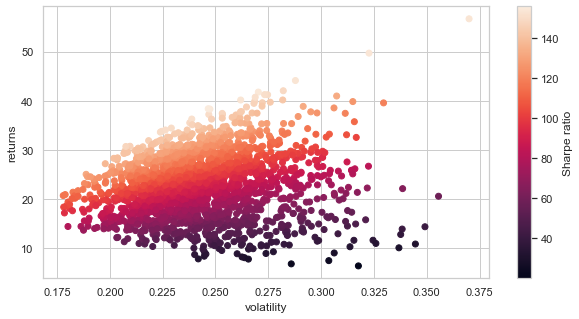

In [313]:
plt.figure(figsize=(10, 5))
plt.scatter(portfolio_risk, portfolio_returns, c=sharpe_ratio_port) 
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar(label='Sharpe ratio')

In [314]:
porfolio_metrics = [portfolio_returns, portfolio_risk, sharpe_ratio_port, portfolio_weights] 
#from Python list we create a Pandas DataFrame
portfolio_dfs = pd.DataFrame(porfolio_metrics)
portfolio_dfs = portfolio_dfs.T
#Rename the columns:
portfolio_dfs.columns = ['Port Returns','Port Risk','Sharpe Ratio','Portfolio Weights']

#convert from object to float the first three columns.
for col in ['Port Returns', 'Port Risk', 'Sharpe Ratio']:
    portfolio_dfs[col] = portfolio_dfs[col].astype(float)

portfolio_dfs = portfolio_dfs.dropna()
portfolio_dfs

Port Returns  Port Risk  Sharpe Ratio  \
0        22.233341   0.260503     85.346914   
1        25.964451   0.225797    114.989199   
2        20.297553   0.231262     87.767824   
3        18.374795   0.235020     78.183116   
4        23.967670   0.221262    108.321528   
...            ...        ...           ...   
1995     28.648286   0.255775    112.004827   
1996     23.835443   0.276415     86.229842   
1997     14.977204   0.251683     59.507330   
1998     30.474547   0.245557    124.103002   
1999     13.301380   0.233560     56.949696   

                                      Portfolio Weights  
0     [0.1519971040473694, 0.20862267532439716, 0.27...  
1     [0.014366177449498752, 0.28728335607089434, 0....  
2     [0.3125080618313906, 0.29472953117476147, 0.02...  
3     [0.17954068908767287, 0.2570337909921922, 0.19...  
4     [0.11294683712624987, 0.3569702190084344, 0.37...  
...                                                 ...  
1995  [0.1069555559928675, 0.2495638187830178, 0.438...  
1996  [0.054651604931106774, 0.2764576114884005, 0.2...  
1997  [0.09996544379963129, 0.2949933099028789, 0.36...  
1998  [0.2086829241149231, 0.03610233181548453, 0.21...  
1999  [0.1539985760976759, 0.055893735413321995, 0.3...  

[2000 rows x 4 columns]

## results

In [315]:
#portfolio with the highest Sharpe Ratio
Highest_sharpe_port = portfolio_dfs.iloc[portfolio_dfs['Sharpe Ratio'].idxmax()]
#portfolio with the minimum risk 
min_risk = portfolio_dfs.iloc[portfolio_dfs['Port Risk'].idxmin()]

print("Portfolio with the highest Sharpe Ratio:")
print()
print(Highest_sharpe_port)
print()
print()
print()
print("Portfolio with the minimum risk:")
print()
print(min_risk)


Portfolio with the highest Sharpe Ratio:

Port Returns                                                 38.377732
Port Risk                                                     0.246547
Sharpe Ratio                                                155.660245
Portfolio Weights    [0.1461355046207517, 0.21455679594328297, 0.12...
Name: 1092, dtype: object



Portfolio with the minimum risk:

Port Returns                                                 20.682111
Port Risk                                                     0.177948
Sharpe Ratio                                                116.224172
Portfolio Weights    [0.34779503571447185, 0.10997662317419651, 0.1...
Name: 171, dtype: object
